In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files

from IPython.display import clear_output
from time import sleep

In [ ]:
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


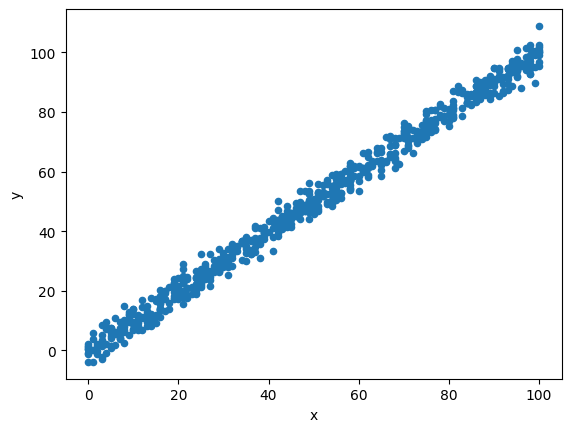

In [ ]:
df = df[df['y'] < 1000]
df.plot(x = "x", y = "y", kind = "scatter")
plt.show()

In [ ]:
w = 0.2
b = 0.3

In [ ]:
# Setting the learning rate to 0.0001
a = 0.0001
# Setting cutoff error
epsilon = 10
# Setting number of max epochs
max_epochs = 100

In [ ]:
def forward_pass(x):
  return w * x + b

def plot_line():
  X = np.linspace(0, 100)
  Y = [forward_pass(i) for i in X]
  df.plot(x = "x", y = "y", kind = "scatter")
  plt.plot(X, Y, 'r')
  plt.show()

def get_dw(x, y, yhat):
  return (1/(2*len(y))) * np.sum((yhat - y) * x)

def get_db(y, yhat):
  return (1/(2*len(y))) * np.sum((yhat - y))

def update(t1, t2, dw, db, lr):
  t1 -= lr * dw
  t2 -= lr * db
  return t1, t2

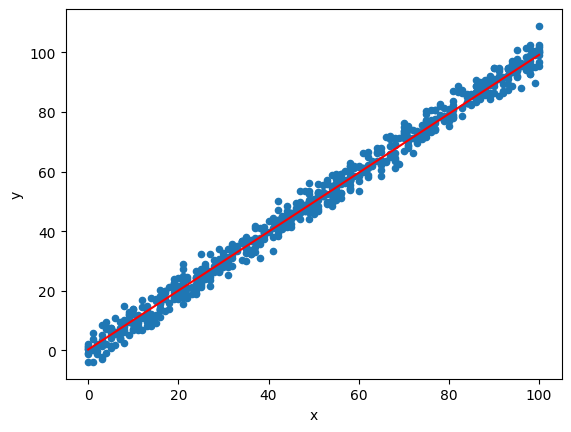

In [ ]:
for _ in range(max_epochs):
  x, y = df['x'], df['y']
  yhat = forward_pass(x)
  dw = get_dw(x, y, yhat)
  db = get_db(y, yhat)
  if (abs(dw) < epsilon and abs(db) < epsilon):
    break
  w, b = update(w, b, dw, db, a)
  clear_output(wait=True)
  plot_line()
  sleep(1)